# UE15CS333
# Project Title - "Auto Illustrating Songs"
Submitted by - Siddharth Suresh ( 01FB15ECS291)
               Yash Mathur (01FB15ECS357)
               Bishesh Sinha (01FB15ECS369)

Libraries to import

In [1]:
import re
import cv2
import nltk
import pandas
import urllib
import pathlib
import operator
import numpy as np

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
from os import listdir
from os.path import isfile, join

In [4]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [5]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

In [6]:
from keras.models import Model
from keras import applications
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

/home/mathuryash5/anaconda3/envs/tf/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Data Path

In [45]:
datapath = "Dataset/Test Song/"

In [46]:
song_names = [datapath + f for f in listdir(datapath) if isfile(join(datapath, f))]
song_names

['Dataset/Test Song/californiadreamin.txt']

Initialize important variables

In [9]:
column_headings=["Line number", "Photo/video identifier"
 , 'Photo/video hash'
 , 'User NSID'
 , 'User nickname'
 , 'Date taken'
 , 'Date uploaded'
 , 'Capture device'
 , 'Title'
 , 'Description'
 , 'User tags (comma-separated)'
 , 'Machine tags (comma-separated)'
 , 'Longitude'
 , 'Latitude'
 , 'Accuracy of the longitude and latitude coordinates (1=world level accuracy, ..., 16=street level accuracy)'
 , 'Photo/video page URL'
 , 'Photo/video download URL'
 , 'License name'
 , 'License URL'
 , 'Photo/video server identifier'
 , 'Photo/video farm identifier'
 , 'Photo/video secret'
 , 'Photo/video secret original'
 , 'Extension of the original photo'
 , 'Photos/video marker (0 = photo, 1 = video)']

In [10]:
stop = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')
wordnet_lemmatizer = WordNetLemmatizer()

In [11]:
base_model = VGG16(weights="imagenet")
vgg16_model = Model(inputs=base_model.input , outputs=base_model.get_layer('fc1').output)

Reading the dataset(10k Images) onto a Pandas Dataframe

In [12]:
dataset = pandas.read_csv( 'Dataset/YFCC(10k Images)/reduced_dataset.txt', sep = '\t', names = column_headings )
dataset.head()

Line number  Photo/video identifier                  Photo/video hash  \
0            0              6985418911  4e2f7a26a1dfbf165a7e30bdabf7e72a   
1            1             10201275523   6ae91cc04fe06697c9404a5360b9b62   
2            2              2297552664    b61f252678da02eaff453bce575cb6   
3            3              7289030198     b545e6a773632e2e65e6ecf1bf385   
4            4              4140939180  7ef1a7715642be6fab2273718c876cae   

      User NSID  User nickname             Date taken  Date uploaded  \
0  39089491@N00      nino63004  2012-02-16 09:56:37.0     1331840483   
1  55289779@N00     booledozer  2013-10-09 15:30:13.0     1381464628   
2   8134076@N03  nathalie.cone  2008-02-27 08:14:36.0     1204166915   
3  53430201@N03   sarabeephoto  2012-05-28 00:23:30.0     1338233199   
4  12940050@N02    enjoiskate8  2009-11-21 08:03:30.0     1259417601   

                   Capture device  \
0     Canon+PowerShot+ELPH+310+HS   
1              Panasonic+DMC-ZS10   
2           Canon+PowerShot+S2+IS   
3     Canon+EOS+DIGITAL+REBEL+XSi   
4  PENTAX+Corporation+PENTAX+K10D   

                                               Title  \
0                                           IMG_0520   
1  Images+from+the+intersection+of+Parliament+and...   
2                          denise%27s+peanut+chicken   
3                             blip+fest+2012+night+3   
4                                           IMGP7409   

                                         Description  \
0                                                NaN   
1                                                NaN   
2  recipe+here%3A+%3Ca+href%3D%22http%3A%2F%2Fall...   
3                                                NaN   
4                                                NaN   

                     ...                      \
0                    ...                       
1                    ...                       
2                    ...                       
3                    ...                       
4                    ...                       

                                Photo/video page URL  \
0  http://www.flickr.com/photos/39089491@N00/6985...   
1  http://www.flickr.com/photos/55289779@N00/1020...   
2  http://www.flickr.com/photos/8134076@N03/22975...   
3  http://www.flickr.com/photos/53430201@N03/7289...   
4  http://www.flickr.com/photos/12940050@N02/4140...   

                            Photo/video download URL  \
0  http://farm8.staticflickr.com/7205/6985418911_...   
1  http://farm6.staticflickr.com/5465/10201275523...   
2  http://farm4.staticflickr.com/3171/2297552664_...   
3  http://farm8.staticflickr.com/7231/7289030198_...   
4  http://farm3.staticflickr.com/2565/4140939180_...   

                                 License name  \
0  Attribution-NonCommercial-NoDerivs License   
1              Attribution-ShareAlike License   
2  Attribution-NonCommercial-NoDerivs License   
3  Attribution-NonCommercial-NoDerivs License   
4  Attribution-NonCommercial-NoDerivs License   

                                         License URL  \
0  http://creativecommons.org/licenses/by-nc-nd/2.0/   
1     http://creativecommons.org/licenses/by-sa/2.0/   
2  http://creativecommons.org/licenses/by-nc-nd/2.0/   
3  http://creativecommons.org/licenses/by-nc-nd/2.0/   
4  http://creativecommons.org/licenses/by-nc-nd/2.0/   

   Photo/video server identifier Photo/video farm identifier  \
0                           7205                           8   
1                           5465                           6   
2                           3171                           4   
3                           7231                           8   
4                           2565                           3   

  Photo/video secret Photo/video secret original  \
0         df7747990d                  692d7e0a7f   
1         3e6ea67c7f                  f400826feb   
2         1ee0e8855d                  bed1547a29   
3         1f1ba44113        

In [13]:
autotags=pandas.read_csv("Dataset/YFCC(10k Images)/reduced_autotags.txt",sep='\t',names=["id","confidence"])
autotags.head()

id                                         confidence
0   6985418911  atoll:0.5220,bay:0.6380,beach:0.9530,coast:0.9...
1  10201275523  alley:0.7910,apartment:0.9290,architecture:0.9...
2   2297552664  curry:0.5170,dish:0.9600,food:0.9650,greens:0....
3   7289030198  art:0.5530,concert:0.9520,fire:0.5540,light pa...
4   4140939180  friends:0.9000,groupshot:1.0000,indoor:0.9330,...

# Using Word Embdeddings

We use the pretrained glove model.
We first convert the glove fileto a word2vec file before using it to train our word2vec model.

In [14]:
glove_input_file = 'glove.6B/glove.6B.50d.txt'
word2vec_output_file = 'glove.6B/glove.6B.50d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 50)

In [15]:
# load the Stanford GloVe model
filename = 'glove.6B/glove.6B.50d.txt.word2vec'
gensim_model = KeyedVectors.load_word2vec_format(filename, binary=False)

# Functions Used

Function to flatten a list

In [16]:
flatten = lambda l: [item for sublist in l for item in sublist]

# Function get_song_lyrics
Thi function takes in the name of the song to be illustrated and returns its lyrics. It returns a list which contains each line of the song

In [17]:
def get_song_lyrics(song_name):
    with open(song_name) as file:
        lyrics = [line.rstrip() for line in file]
        # Remove empty strings
        lyrics = [line for line in lyrics if len(line)>0]
        return lyrics

# Function get_all_lyrics

This function returns the lyrics of all the songs to be illustrated. It returns a 2D list.

In [18]:
def get_all_lyrics():
    lyrics_list = []
    for song_name in song_names:
        lyrics_list.append(get_song_lyrics(song_name))
    return lyrics_list

# Function get_preprocessed_lyrics

This function tokenises a sentence into words and returns a list of tokenised words.

In [19]:
def get_processed_lyrics(line):
        vocab = []
        vocab.append([i for i in tokenizer.tokenize(line.lower()) if i not in stop])
        vocab = flatten(vocab)
        return vocab

# Function get_lemmatized_words

This function takes in the tokenised words from each line and lemmatizes them and returns a list of lemmatized words

In [20]:
def get_lemmatized_vocab(vocab):
    lem_vocab = []
    for word in vocab:
        lem_vocab.append(wordnet_lemmatizer.lemmatize(word))
    return lem_vocab    

# Function get_tag_frequency

This function takes in the noun and verbs from the sentence and the image tags of an image and computes the tag frequency. It basically checks the overlap of the nouns and verbs present in the lemmatised sentence and the image tags.

In [21]:
def get_tag_frequency(noun_verb_vocab, image_tags):
    tag_frequency = []
    for tags in image_tags:
        count = 0
        for word in noun_verb_vocab:
            if word in tags:
                count += 1
        tag_frequency.append(count/(len(noun_verb_vocab)))
    return tag_frequency

# Function candidate_image_url

This function takes in the image id of an image and returns its downloading URL.

In [22]:
def candidate_image_url(image_id):
    image_url=dataset[dataset['Photo/video identifier'] == image_id]['Photo/video download URL']
    return image_url

# Function save_image

This function takes in the URL of an image and downlaods it. It also takes in a count whcih is used to name the image while saving it on the disk.

In [23]:
#Saves the photo url in the results folder
def save_image(url,count):
    results_folder="Results/"
    path = pathlib.Path(results_folder)
    print("Saving " + url + " in Path " + results_folder)
    if(not path.exists()):
        pathlib.Path(results_folder).mkdir(parents=True)
    try:
        #print(url[0])
        #count += 1
        urllib.request.urlretrieve(url,  results_folder + str(count) +".jpg")
    except Exception as e:
        print(e, 'Download failure')
        


# Function save_candidate_image

This function is used to save the candidate images. It works exactly like the function save_image.

In [24]:
def save_candidate_image(url,folder_count, image_count):
    results_folder="Candidate/"+str(folder_count)+"/"
    path = pathlib.Path(results_folder)
    print("Saving " + url + " in Path " + results_folder)
    if(not path.exists()):
        pathlib.Path(results_folder).mkdir(parents=True)
    try:
        #print(url[0])
        #count += 1
        urllib.request.urlretrieve(url,  results_folder + str(image_count) +".jpg")
    except Exception as e:
        print(e, 'Download failure')

# Function generate_images

This function saves the final image which is selected from the 100 candidate images in the Results folder.

In [25]:
def generate_images(song):
    count=0
    for i in song:
        image_url=candidate_image_url(i)
        #print(i)
        #image_url,similarity,image_id=select_candidate_images(i)
        #print(image_url[0])
        save_image(image_url[0],count)
        print(image_id)
        count=count+1

# Function get_l2_distance

This function finds out the l2 distance between the vector representations of the previous selected image and the current candidate image

In [26]:
def get_l2_distance(previous_image,current_image):
    content_features_previous_image=get_vec_representation_for_image(previous_image)
    content_features_current_image=get_vec_representation_for_image(current_image)
    dist=np.linalg.norm(content_features_previous_image-content_features_current_image)
    return dist

# Function get_rgb_correlation

This function finds the rgb histogram correlation between the previously selected image and the current candidate image

In [27]:
def get_rgb_correl(prev_img_path, current_img_path):
    prev_img = cv2.imread(prev_img_path)
    current_img = cv2.imread(current_img_path)
    prev_hist = cv2.calcHist([prev_img], [0, 1, 2], None, [256, 256, 256],[0, 256, 0, 256, 0, 256])
    prev_hist = cv2.normalize(prev_hist, None).flatten()        
    current_hist = cv2.calcHist([current_img], [0, 1, 2], None, [256, 256, 256],[0, 256, 0, 256, 0, 256])
    current_hist = cv2.normalize(current_hist, None).flatten()        
    rgb_correl = cv2.compareHist(prev_hist, current_hist, cv2.HISTCMP_CORREL)
    return abs(rgb_correl)

# Function get_vec_for_image
The function get_vec_representation_for images takes in a image path and returns its vector representations. The image is passed into a pre-trained VGG-16 model and the vector representations are the output from the first fully connected layer of the network.

In [28]:
def get_vec_representation_for_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    fc1_features = vgg16_model.predict(x)
    return fc1_features

# Function error_function

This function calculates a value which is used to chose an image out of the 100 candidate images.

In [29]:
def error_function(semantic,content_features,rgb_correl,lambda1,lambda2,lambda3):
#     print(semantic)
#     print(content_features)
#     print(rgb_correl)
    final_value=(lambda1 * semantic) + (lambda2 * content_features) + (lambda3 * rgb_correl)
#     print(final_value)
    return final_value

# Function making_vocab_from_imagetags

The function returns a 2d list consisting of image tags for each image. It takes in the column of the dataframe which contains word tags as an argument


In [30]:
def making_vocab_from_imagetags(dataset_column):
    vocab=[]
    for j in dataset_column:
        words=[]
        if(type(j)==type(float())):
            vocab.append(['unk'])
            continue
        l=j.split(',')
        for i in l:
            k=i.split(":")
            words.append(k[0])
        vocab.append(words)
    return vocab

# Function vocab_with_autotags

This function takes in an existing vocabulary with user tags and adds corresponding auto tags to it.It returns the updated vocabulary list. It only appends those autotags which have a confidence greater thatn 80%

In [31]:
def vocab_with_autotags(vocab):
    index=0
    for row in autotags['confidence']:
        if(type(row)==type(float())):
            index=index+1
            continue
        tags_list=row.split(',')
        for tag in tags_list:
            a=tag.split(":")
            if(float(a[1])>=0.8):
                vocab[index].append(a[0])
        index=index+1
    return vocab

# Function to generate the final vocabulary

The gen_final_vocab takes in an existing vocabulary and splits the words into different tags if some of the tags in the vocab contain a "%" or a "+" in the middle.

Eg: <br>
a=[["Hi","my%name","is+Siddharth"],["But","people+call+me%sid"]] <br>
b=gen_final_vocab(a)<br>
print(b)<br>
[["Hi","my","name","is","Siddharth"],["But","people","call","me","sid"]]<br>

In [32]:
def gen_final_vocab(vocab):
    final_vocab=[]
    count = 1
    for auto_tags in vocab:
#         print(count)
        count += 1
        temp=[]
        if(type(auto_tags)==type(float())):
            print("Is this needed\n")
            final_vocab.append('unk')
            continue
        for tag in auto_tags:
            temp.append(re.split('\+|%',tag))
        
        final_vocab.append(flatten(temp))
    return final_vocab

# Function generate_image_id_with_tags

This function is used to generate a list of tuples.
Each tuple contains an image id and its corresponding image tags(user tags+auto tags)

In [33]:
def generate_image_id_with_tags(final_vocab):
    dictionary={}
    for image_tags in final_vocab:
        image_index=final_vocab.index(image_tags)
        image_id=dataset['Photo/video identifier'][image_index]
        temp={image_id:image_tags}
        dictionary.update(temp)
#     print(dictionary)
    keys=dictionary.keys()
#     print(keys)
    values=dictionary.values()
#     print(values)
    custom_list=[]
    for (i,j) in zip(keys,values):
        custom_list.append((i,j))
    return custom_list   
        

# Function preprocess_song

This function takes in a song and returns only the lemmatized Noun and Verb phrases from each line.

In [34]:
def preprocess_song(song):
    song_vocab = []
    song_nv_vocab = []
    for line in song:
        line_vocab = get_processed_lyrics(line)
        lematized_vocab = get_lemmatized_vocab(line_vocab)
        tagged_vocab = nltk.pos_tag(lematized_vocab)
        noun_verb = [item for item in tagged_vocab if item[1][0] == 'N' or item[1][0] == 'V' ]
        song_vocab.append(lematized_vocab)
        song_nv_vocab.append([word for (word,tag) in noun_verb])
    return song_vocab, song_nv_vocab

# Function select_candidate_images

This function selects the top 100 candidate images for a line in the song.<br>
It computes the value of cosine similarity of a line with all the images in the dataset.<br>
Only the top 100 most similar images are selected and the function returns a 2D tuple with each tuple consisting the image ID and its corresponding cosine similarity with the sentence.

In [35]:
def select_candidate_images(sentence_from_song):
    sentence_length=len(sentence_from_song)
    similarity=[]
    for image_tags in image_vocab:
        count=0
        cos_similarity=0
        image_tag_length=len(image_tags)
        for tag in image_tags:
            for word in sentence_from_song:
                if(word not in gensim_model.vocab.keys() or tag not in gensim_model.vocab.keys()):
                    count=count+1
                    continue
                cos_similarity = cos_similarity + gensim_model.similarity(word,tag)
            norm = (sentence_length * image_tag_length) - count
        if (norm == 0):
            similarity.append(0)
        else:
            similarity.append(cos_similarity / norm)       

    dictionary={}
    print(len(similarity))
    for image_similarity in similarity:
        image_index=similarity.index(image_similarity)
        image_id=dataset['Photo/video identifier'][image_index]
        temp={image_id:image_similarity}
        dictionary.update(temp)
        
    #image_to_be_selected=similarity.index(max(similarity))
    #print(image_to_be_selected)
    #image_id=autotags['id'][image_to_be_selected]
    #image_url=dataset[dataset['Photo/video identifier'] == image_id]['Photo/video download URL']
    #return list(image_url),similarity ,image_id 
    sorted_dictionary=sorted(dictionary.items(), key=operator.itemgetter(1))
    return sorted_dictionary[-100:]
    

# Function get_candidate_images

This function takes in a song line(returned by preprocess_song) and saves 100 candidate images in the candidate images folder.

In [36]:
def get_candidate_images(song_line, line_count):
    candidate_images = select_candidate_images(song_line)
    image_tags = []
    image_count = 0
    generated_image_id_with_tags = generate_image_id_with_tags(image_vocab)
    for image in candidate_images:
        image_id = image[0]
        for i in generated_image_id_with_tags:
            if(i[0] == image_id):
                image_tags.append(i[1])
        candidate_image_url = dataset[dataset['Photo/video identifier'] == image_id]['Photo/video download URL']
#         print(candidate_image_url.iloc[0])
        save_candidate_image(candidate_image_url.iloc[0], line_count, image_count)
        image_count += 1
    return image_tags, candidate_images

# Function get_final_image

This function picks an image out of the 100 candidate images chosen. The first image which is picked is picked based on the semantic similarity(tag_frequency+cosine_similarity). The images picked thereafter use the error_function to decide on the final image.

In [ ]:
def get_final_image(is_first_line,line_count):
    print("Selecting Final Image")
    tag_frequency = get_tag_frequency(song_nv_vocab, candidate_image_tags)
    value_to_compute_required_image = []
    for i in range(100):
        value_to_compute_required_image.append(tag_frequency[i] + candidate_images[i][1])
    if(is_first_line):
        value_of_required_image = max(value_to_compute_required_image)
        image_id_of_generated_image = int(candidate_images[value_to_compute_required_image.index(value_of_required_image)][0])
        image_url = dataset[dataset['Photo/video identifier'] == image_id_of_generated_image]['Photo/video download URL']
        save_image(image_url.iloc[0], line_count)         
    else:
        previous_image = "Results/" + str(line_count-1) + ".jpg"
#         print(previous_image)
        image_selection_from_candidate_images = []

        for image in range(len(candidate_images)):
            current_image = "Candidate/" + str(line_count) + "/" + str(image) + ".jpg"
            print("Analysing " + current_image)
            rgb_correl = get_rgb_correl(previous_image, current_image)
            content_features = get_l2_distance(previous_image, current_image)
            image_selection_from_candidate_images.append(error_function(value_to_compute_required_image[image], content_features, rgb_correl, 1, 1, 1))
        value_of_required_image = max(image_selection_from_candidate_images) 
    
        image_id_of_generated_image = int(candidate_images[image_selection_from_candidate_images.index(value_of_required_image)][0])
        image_url = dataset[dataset['Photo/video identifier'] == image_id_of_generated_image]['Photo/video download URL']
        save_image(image_url.iloc[0], line_count)         

In [70]:
def visualize_song_line(song):
    for i in range(len(song_vocab)):
        print(song_vocab[i])
        image_path="Results/"+str(i)+".jpg"
        im = Image.open(image_path)
        im.thumbnail((1024, 1024), Image.ANTIALIAS) # resizes image in-place
        imgplot = plt.imshow(im)
        plt.show()

# Preprocess Image Data

In [39]:
image_user_vocab = making_vocab_from_imagetags(dataset['User tags (comma-separated)'])

In [40]:
image_unprocessed_vocab=vocab_with_autotags(image_user_vocab)
len(image_unprocessed_vocab)

10000

In [41]:
image_vocab=gen_final_vocab(image_unprocessed_vocab)
print(len(image_vocab))

10000


# Preprocess Songs

In [47]:
all_songs = get_all_lyrics()
all_songs

[['All the leaves are brown (all the leaves are brown)',
  'And the sky is grey (and the sky is grey)',
  "I've been for a walk (I've been for a walk)",
  "On a winter's day (on a winter's day)",
  "I'd be safe and warm (I'd be safe and warm)",
  'If I was in L.A. (if I was in L.A.)',
  "California dreamin' (California dreamin')",
  "On such a winter's day",
  'Stopped into a church',
  'I passed along the way',
  'Well, I got down on my knees (got down on my knees)',
  'And I pretend to pray (I pretend to pray)',
  'You know the preacher like the cold (preacher like the cold)',
  "He knows I'm gonna stay (knows I'm gonna stay)",
  "California dreamin' (California dreamin')",
  "On such a winter's day",
  'All the leaves are brown (all the leaves are brown)',
  'And the sky is grey (and the sky is grey)',
  "I've been for a walk (I've been for a walk)",
  "On a winter's day (on a winter's day)",
  "If I didn't tell her (if I didn't tell her)",
  'I could leave today (I could leave toda

# Generate the image sequence (Results stored in "Results" Folder)

In [68]:
is_first_line = 1
for song in all_songs:
    song_vocab, song_nv_vocab = preprocess_song(song)
#     print(song_vocab)
    line_count = 0
    for song_line in song_vocab:
        print(song_line)
        path = pathlib.Path("Candidate/" + str(line_count) + "/")
        # To avoid downloading over and over
        if(path.exists()):
            if( len(listdir("Candidate/" + str(line_count) + "/")) == 100):
#                 print("Candidate/" + str(line_count) + "/")
                line_count += 1
                continue
        candidate_image_tags, candidate_images = get_candidate_images(song_line, line_count)
        get_final_image(is_first_line,line_count)
        is_first_line = 0
        line_count += 1

['leaf', 'brown', 'leaf', 'brown']
['sky', 'grey', 'sky', 'grey']
['walk', 'walk']
['winter', 'day', 'winter', 'day']
['safe', 'warm', 'safe', 'warm']
['l', 'l']
['california', 'dreamin', 'california', 'dreamin']
['winter', 'day']
['stopped', 'church']
['passed', 'along', 'way']
['well', 'got', 'knee', 'got', 'knee']
['pretend', 'pray', 'pretend', 'pray']
['know', 'preacher', 'like', 'cold', 'preacher', 'like', 'cold']
['know', 'gonna', 'stay', 'know', 'gonna', 'stay']
['california', 'dreamin', 'california', 'dreamin']
['winter', 'day']
['leaf', 'brown', 'leaf', 'brown']
['sky', 'grey', 'sky', 'grey']
['walk', 'walk']
['winter', 'day', 'winter', 'day']
['tell', 'tell']
['could', 'leave', 'today', 'could', 'leave', 'today']
['california', 'dreamin', 'california', 'dreamin']
['winter', 'day', 'california', 'dreamin']
['winter', 'day', 'california', 'dreamin']
['winter', 'day']


['leaf', 'brown', 'leaf', 'brown']


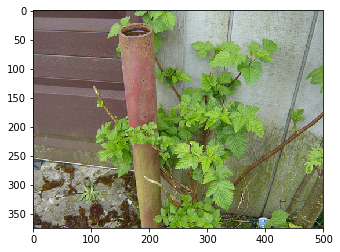

['sky', 'grey', 'sky', 'grey']


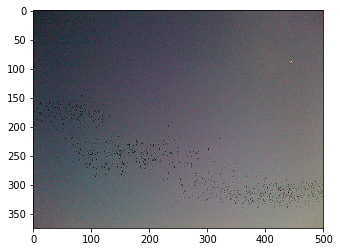

['walk', 'walk']


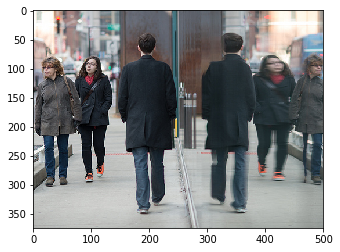

['winter', 'day', 'winter', 'day']


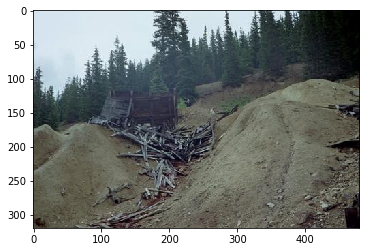

['safe', 'warm', 'safe', 'warm']


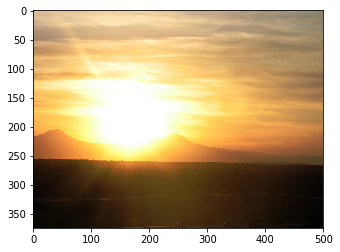

['l', 'l']


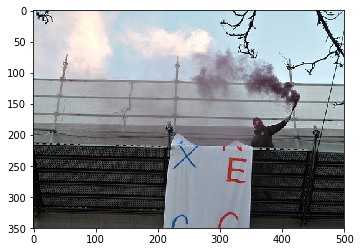

['california', 'dreamin', 'california', 'dreamin']


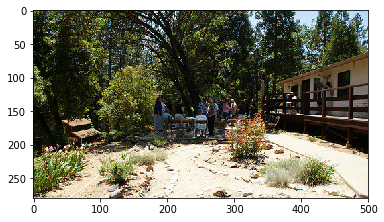

['winter', 'day']


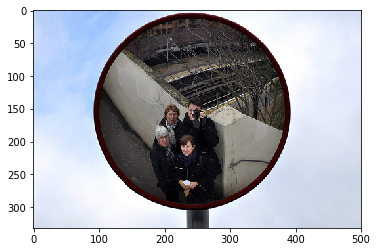

['stopped', 'church']


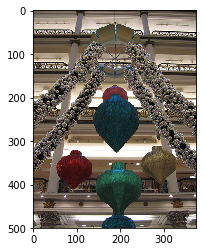

['passed', 'along', 'way']


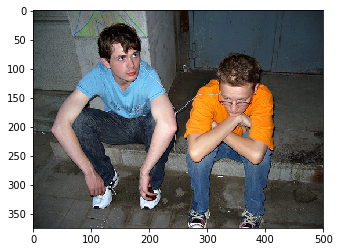

['well', 'got', 'knee', 'got', 'knee']


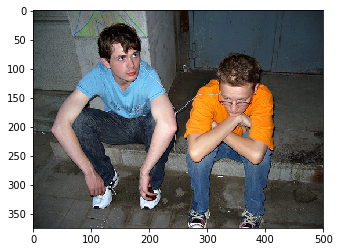

['pretend', 'pray', 'pretend', 'pray']


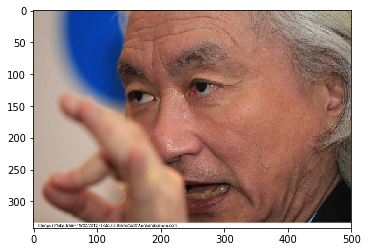

['know', 'preacher', 'like', 'cold', 'preacher', 'like', 'cold']


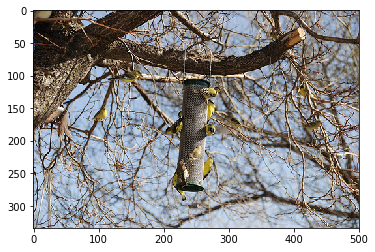

['know', 'gonna', 'stay', 'know', 'gonna', 'stay']


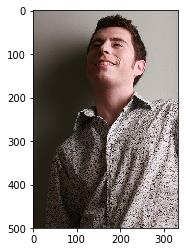

['california', 'dreamin', 'california', 'dreamin']


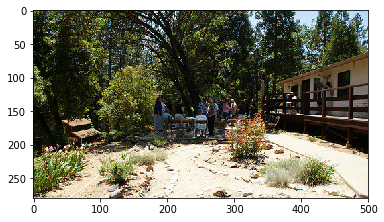

['winter', 'day']


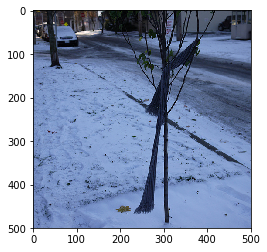

['leaf', 'brown', 'leaf', 'brown']


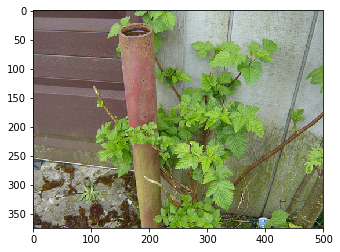

['sky', 'grey', 'sky', 'grey']


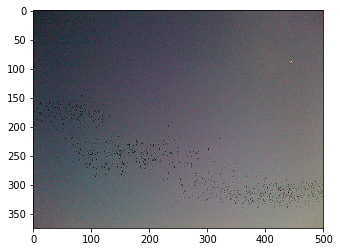

['walk', 'walk']


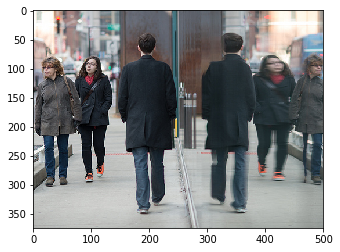

['winter', 'day', 'winter', 'day']


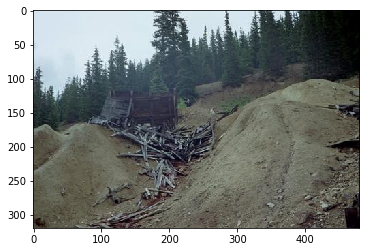

['tell', 'tell']


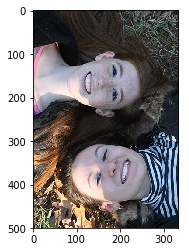

['could', 'leave', 'today', 'could', 'leave', 'today']


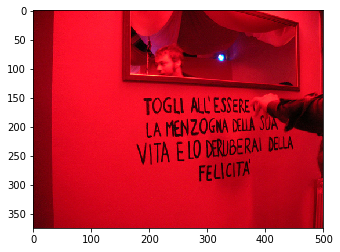

['california', 'dreamin', 'california', 'dreamin']


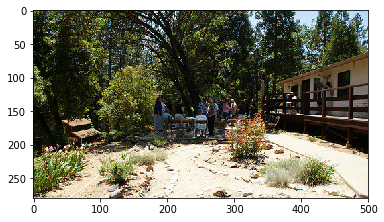

['winter', 'day', 'california', 'dreamin']


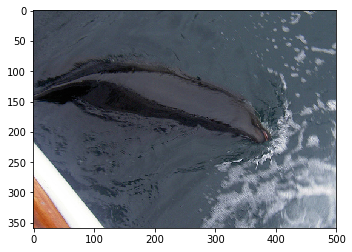

['winter', 'day', 'california', 'dreamin']


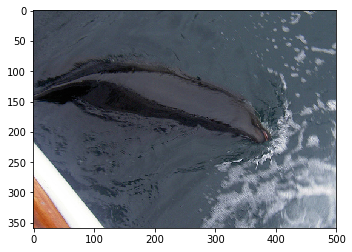

['winter', 'day']


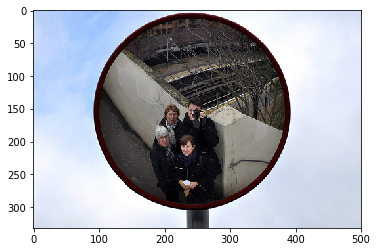

In [71]:
visualize_song_line(all_songs[0])